# Data Loader

In [56]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path

In [196]:
class MultiMnistDataset(Dataset):
    """Multi-Digit MNist dataset."""

    def __init__(self, dirRoot, transform=None):
        """
        Args:
            dirRoot (string): Path to directory structure containing images
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.files = []
        self._init_data(dirRoot)
        self.n = len(self.files)
        self.transform = transform

    def _init_data(self, dirRoot):
        for (dirpath, dirnames, filenames) in os.walk(dirRoot):
            for f in filenames:
                self.files.append(os.path.join(dirpath,f))
    
    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        image_file = self.files[idx]
        digits = Path(image_file).parent.stem
        image = io.imread(image_file)
        image = torch.tensor(image, dtype=torch.float)
        mean = torch.tensor(5.8227706)
        std =  torch.tensor(35.0598)
        image = (image-mean)/std
        if self.transform:
            image = self.transform(image)
        sample = {'image': image, 'digits': digits}
        return sample


1115
29142


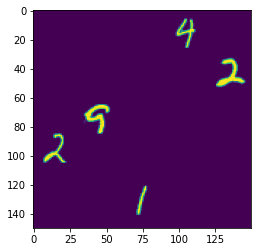

In [197]:
dataset = MultiMnistDataset('./data/multiMNist/train')
print(len(dataset))
datum = dataset[111]
plt.imshow(datum['image'])
print(datum['digits'])

In [198]:
mean = 0.0
std = 0.0
for data in dataset:
    images = data['image']
    mean += images.mean()
    std += images.std()

mean /= len(dataset)
std /= len(dataset)
print(mean.numpy(),std)

2.4861467e-07 tensor(1.0000)
